# PHY4268 Tutorial 8 - Survey of Qiskit Quantum Operators

 1. **S. G. Nana Engo**, serge.nana-engo@facsciences-uy1.cm
    * Department of Physics, Faculty of Science, University of Yaounde I
1. **J-P. Tchapet Njafa**, jean-pierre.tchapet-njafa@univ-maroua.cm
    * Department of Physics, Faculty of Science, University of Maroua
       
May 2024

Dans ce tutoriel, nous faisons la synthèse des différentes opérations disponibles dans Qiskit, à savoir:

- Portes quantiques à un seul qubit
- Portes quantiques multi-qubits
- Mesures
- Réinitialisation
- Portes conditionnelles

Nous allons également revoir comment utiliser les trois différents simulateurs :

- UnitarySimulator
- QasmSimulator
- StatevectorSimulator

In [1]:
import qiskit
qiskit.__version__ 

'1.1.0'

$\newcommand{\ket}[1]{|#1\rangle}$

In [2]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.visualization import circuit_drawer, array_to_latex
from qiskit_aer import UnitarySimulator, QasmSimulator

In [3]:
simulator = UnitarySimulator()

* Packages supplémentaires utiles

In [4]:
import numpy as np
from math import pi

## États quantiques à un seul Qubit <a name="single_states"/>

Un état quantique d'un seul qubit peut être écrit comme
$$\ket{\psi} = \alpha\ket{0} + \beta \ket{1},$$
où $\alpha$ et $\beta$ sont des nombres complexes. Dans une mesure, la probabilité que le bit soit dans $\ket{0}$ est $|\alpha|^2$ et $\ket{1}$ est $|\beta|^2$. En tant que vecteur, c'est

$$
\ket{\psi} =  
\begin{pmatrix}
\alpha \\
\beta
\end{pmatrix}.
$$

Notez qu'en raison de la conservation de la probabilité $|\alpha|^2+ |\beta|^2 = 1$, et puisque la phase globale est indétectable $\ket{\psi} := e^{i\delta} \ket{\psi}$, nous n'avons besoin que de deux nombres réels pour décrire un seul état quantique de qubit.

Une représentation pratique est

$$\ket{\psi} = \cos(\frac{\theta}{2})\ket{0} + \sin(\frac{\theta}{2})e^{i\phi}\ket{1},$$

où $0\leq \phi < 2\pi$ et $0\leq \theta \leq \pi$. À partir de là, il est clair qu'il existe une correspondance biunivoque entre les états de qubit ($\mathbb{C}^2$) et les points à la surface d'une sphère unitaire ($\mathbb{R}^3$). C'est ce qu'on appelle la représentation de la sphère de Bloch d'un état qubit.

Les portes/opérations quantiques sont généralement représentées sous forme de matrices. Une porte qui agit sur un qubit est représentée par une matrice unitaire $2\times 2$ $\mathtt{U}$. L'action de la porte quantique est trouvée en multipliant la matrice représentant la porte avec le vecteur qui représente l'état quantique.

$$\ket{\psi'} = \mathtt{U}\ket{\psi}$$

Un unitaire général doit pouvoir amener le $\ket{0}$ à l'état ci-dessus. C'est-à-dire

$$
\mathtt{U} = \begin{pmatrix}
\cos(\frac{\theta}{2}) & a \\
e^{i\phi}\sin(\frac{\theta}{2}) & b 
\end{pmatrix},
$$

où $a$ et $b$ sont des nombres complexes contraints tels que $\mathtt{U}^\dagger\mathtt{U} =\mathtt{I}$ pour tous $0\leq\theta\leq\pi$ et $0\leq \phi<2\pi$. Cela donne 3 contraintes et ainsi $a\rightarrow -e^{i\lambda}\sin(\frac{\theta}{2})$ et $b\rightarrow e^{i\lambda+i\phi}\cos(\frac{\theta}{2})$ où $0\leq \lambda<2\pi$ donnant

$$
\mathtt{U}(\theta, \phi, \lambda) =
    \begin{pmatrix}
        \cos\left(\frac{\theta}{2}\right)          & -e^{i\lambda}\sin\left(\frac{\theta}{2}\right) \\
        e^{i\phi}\sin\left(\frac{\theta}{2}\right) & e^{i(\phi+\lambda)}\cos\left(\frac{\theta}{2}\right)
    \end{pmatrix}.
$$

C'est la forme la plus générale d'une porte quantique à un seul qubit unitaire.

## Portes à un seul qubit <a name="single_gates"/>

Les portes à un seul qubit disponibles sont :
- Porte en U
- porte P
- Porte d'identité
- Portes Pauli
- Portes Clifford
- portes C3
- Portes de rotation standard

Nous avons fourni un backend : `unitary_simulator` pour vous permettre de calculer les matrices unitaires.

In [5]:
q = QuantumRegister(1)

### Porte U

Dans Qiskit, nous avous accès à l'unité générale en utilisant la porte $\mathtt{U}$, qui a la forme matricielle suivante
$$
\mathtt{U}(\theta, \phi, \lambda) =
    \begin{pmatrix}
        \cos\left(\frac{\theta}{2}\right)          & -e^{i\lambda}\sin\left(\frac{\theta}{2}\right) \\
        e^{i\phi}\sin\left(\frac{\theta}{2}\right) & e^{i(\phi+\lambda)}\cos\left(\frac{\theta}{2}\right)
    \end{pmatrix}
$$

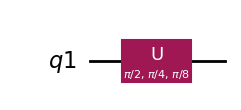

In [6]:
qc = QuantumCircuit(q)
qc.u(pi/2,pi/4,pi/8,q[0])
qc.draw('mpl')

In [7]:
job = simulator.run(transpile(qc, simulator))
array_to_latex(job.result().get_unitary(qc, decimals=3))

<IPython.core.display.Latex object>

<div class="alert alert-info">
Remarque sur la dépréciation de la porte U. 

Les méthodes QuantumCircuit $u1$, $u2$ et $u3$ sont désormais obsolètes. Au lieu de cela, les remplacements suivants doivent être utilisés.
</div>

- $u1(\lambda) = p(\lambda) = u(0, 0, \lambda)$

- $u2(\phi, \lambda) = u(\frac{\pi}{2}, \phi, \lambda) = p(\frac{\pi}{2} + \phi) \cdot sx \cdot p(\frac{\pi}{2} - \lambda)$

- $u3(\theta, \phi, \lambda) = u(\theta, \phi, \lambda) = p(\phi + \pi) \cdot sx \cdot p(\theta + \pi) \cdot sx \cdot p(\lambda)$

```python
# qc.u1(lambda) est maintenant :
qc.p(lambda)

# qc.u2(phi, lambda) est maintenant :
qc.u(pi/2, phi, lambda)

# qc.u3(theta, phi, lambda) est maintenant :
qc.u(theta, phi, lambda)
```

### Porte P

Pour appliquer une phase quantique, on utilise la porte $p(\lambda)= u(0, 0, \lambda)$ dont la forme matricielle est

$$
p(\lambda) = 
\begin{pmatrix}
1 & 0 \\
0 & e^{i \lambda}
\end{pmatrix}.$$

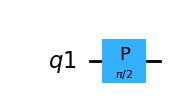

In [8]:
qc = QuantumCircuit(q)
qc.p(pi/2,q)
qc.draw('mpl')

In [9]:
job = simulator.run(transpile(qc, simulator))
array_to_latex(job.result().get_unitary(qc, decimals=3))

<IPython.core.display.Latex object>

### Porte d'identité

La porte d'identité est $\mathtt{I} = p(0)$.

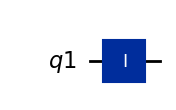

In [10]:
qc = QuantumCircuit(q)
qc.id(q)
qc.draw('mpl')

In [11]:
job = simulator.run(transpile(qc, simulator))
array_to_latex(job.result().get_unitary(qc, decimals=3))

<IPython.core.display.Latex object>

### Portes Pauli

#### $\mathtt{X}$ : porte bit-flip 

La porte bit-flip $\mathtt{X}$ est définie comme suit :

$$
\mathtt{X}   =  
\begin{pmatrix}
0 & 1\\
1 & 0
\end{pmatrix}= u(\pi,0,\pi).
$$

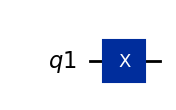

In [12]:
qc = QuantumCircuit(q)
qc.x(q)
qc.draw('mpl')

In [13]:
job = simulator.run(transpile(qc, simulator))
array_to_latex(job.result().get_unitary(qc, decimals=3))

<IPython.core.display.Latex object>

#### $\mathtt{Y}$: Porte bit- and phase-flip

La porte $\mathtt{Y}$ est définie comme suit:

$$
\mathtt{Y}  = 
\begin{pmatrix}
0 & -i\\
i & 0
\end{pmatrix}=u(\pi,\pi/2,\pi/2).
$$

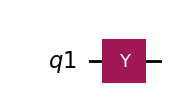

In [14]:
qc = QuantumCircuit(q)
qc.y(q)
qc.draw('mpl')

In [15]:
job = simulator.run(transpile(qc, simulator))
array_to_latex(job.result().get_unitary(qc, decimals=3))

<IPython.core.display.Latex object>

#### $\mathtt{Z}$: Porte phase-flip 

La porte $\mathtt{Z}$ est définie comme suit:
$$
\mathtt{Z} = \begin{pmatrix}
1 & 0\\
0 & -1
\end{pmatrix}=p(\pi).
$$

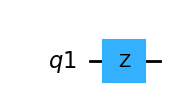

In [16]:
qc = QuantumCircuit(q)
qc.z(q)
qc.draw('mpl')

In [17]:
job = simulator.run(transpile(qc, simulator))
array_to_latex(job.result().get_unitary(qc, decimals=3))

<IPython.core.display.Latex object>

### Portes de Clifford 

#### Porte Hadamard 

$$
\mathtt{H} = 
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1\\
1 & -1
\end{pmatrix}= u(\pi/2,0,\pi).
$$

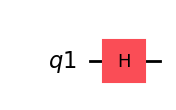

In [18]:
qc = QuantumCircuit(q)
qc.h(q)
qc.draw('mpl')

In [19]:
job = simulator.run(transpile(qc, simulator))
array_to_latex(job.result().get_unitary(qc, decimals=3))

<IPython.core.display.Latex object>

#### Porte $S$ (ou, $\sqrt{Z}$ phase) 

$$
S = 
\begin{pmatrix}
1 & 0\\
0 & i
\end{pmatrix}= p(\pi/2).
$$

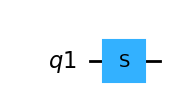

In [20]:
qc = QuantumCircuit(q)
qc.s(q)
qc.draw('mpl')

In [21]:
job = simulator.run(transpile(qc, simulator))
array_to_latex(job.result().get_unitary(qc, decimals=3))

<IPython.core.display.Latex object>

#### $S^{\dagger}$ (ou, conjugué de phase $\sqrt{Z}$) 

$$
S^{\dagger} = 
\begin{pmatrix}
1 & 0\\
0 & -i
\end{pmatrix}= p(-\pi/2).
$$


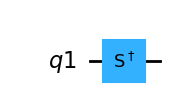

In [22]:
qc = QuantumCircuit(q)
qc.sdg(q)
qc.draw('mpl')

In [23]:
job = simulator.run(transpile(qc, simulator))
array_to_latex(job.result().get_unitary(qc, decimals=3))

<IPython.core.display.Latex object>

### Portes $C3$ 
#### $T$ (ou Porte $\sqrt{S}$ phase) 

$$
T = 
\begin{pmatrix}
1 & 0\\
0 & e^{i \pi/4}
\end{pmatrix}= p(\pi/4) .
$$

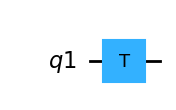

In [24]:
qc = QuantumCircuit(q)
qc.t(q)
qc.draw('mpl')

In [25]:
job = simulator.run(transpile(qc, simulator))
array_to_latex(job.result().get_unitary(qc, decimals=3))

<IPython.core.display.Latex object>

#### $T^{\dagger}$ (ou, porte conjugué $\sqrt{S}$ phase) 

$$
T^{\dagger} =  
\begin{pmatrix}
1 & 0\\
0 & e^{-i \pi/4}
\end{pmatrix}= p(-\pi/4).
$$

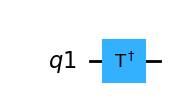

In [26]:
qc = QuantumCircuit(q)
qc.tdg(q)
qc.draw('mpl')

In [27]:
job = simulator.run(transpile(qc, simulator))
array_to_latex(job.result().get_unitary(qc, decimals=3))

<IPython.core.display.Latex object>

###  Rotations Standard

Les portes de rotation standard rotation sont celles qui definissent les rotations autour des  Paulis $P=\{\mathtt{X},\mathtt{Y},\mathtt{Z}\}$. Elles sont définies comme
$$ \mathtt{R}_P(\theta) = \exp(-i \theta P/2) = \cos(\theta/2)\mathtt{I} -i \sin(\theta/2)P$$

#### Rotation autour de X
$$
\mathtt{R}_x(\theta) = 
\begin{pmatrix}
\cos(\theta/2) & -i\sin(\theta/2)\\
-i\sin(\theta/2) & \cos(\theta/2)
\end{pmatrix} = u(\theta, -\pi/2,\pi/2)
$$

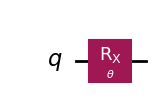

In [28]:
from qiskit.circuit import Parameter
from qiskit.quantum_info import Operator

pqc = QuantumCircuit(1)

x = Parameter('$\\theta$')
pqc.rx(x, 0)
pqc.draw('mpl')



In [29]:
pqc2 = pqc.assign_parameters({x:pi})

In [30]:
op = Operator(pqc2)
#op.to_sympy()
array_to_latex(op.to_matrix())

<IPython.core.display.Latex object>

In [31]:
#pour qu'Operator tienne compte des paramètres
!pip install qiskit_symb

ERROR: Could not find a version that satisfies the requirement qiskit_symb (from versions: none)
ERROR: No matching distribution found for qiskit_symb


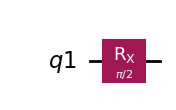

In [32]:
qc = QuantumCircuit(q)
qc.rx(pi/2,q)
qc.draw('mpl')

In [33]:
job = simulator.run(transpile(qc, simulator))
array_to_latex(job.result().get_unitary(qc, decimals=3))

<IPython.core.display.Latex object>

#### Rotation autour de Y
$$
\mathtt{R}_y(\theta) =
\begin{pmatrix}
\cos(\theta/2) & - \sin(\theta/2)\\
\sin(\theta/2) & \cos(\theta/2)
\end{pmatrix} =u(\theta,0,0).
$$

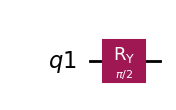

In [34]:
qc = QuantumCircuit(q)
qc.ry(pi/2,q)
qc.draw('mpl')

In [35]:
job = simulator.run(transpile(qc, simulator))
array_to_latex(job.result().get_unitary(qc, decimals=3))

<IPython.core.display.Latex object>

#### Rotation autour de  Z
$$
\mathtt{R}_z(\phi) = 
\begin{pmatrix}
e^{-i \phi/2} & 0 \\
0 & e^{i \phi/2}
\end{pmatrix}\equiv p(\phi).
$$
Notez qu'ici nous avons utilisé un équivalent car il est différent de $p$ par une phase globale $e^{-i \phi/2}$.

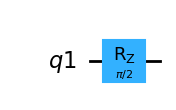

In [36]:
qc = QuantumCircuit(q)
qc.rz(pi/2,q)
qc.draw('mpl')

In [37]:
job = simulator.run(transpile(qc, simulator))
array_to_latex(job.result().get_unitary(qc, decimals=3))

<IPython.core.display.Latex object>

Notez que ceci est différent en raison uniquement d'une phase globale.

## Do it yourself

Écrire le code qiskit qui reproduit le circuit suivant

![qkog](./Graphics/qkpg.png)


## Portes multi-qubits

### Préliminaires mathématiques

L'espace d'un calculateur quantique croît de manière exponentielle avec le nombre de qubits. Pour les qubits $n$, l'espace vectoriel complexe a la dimension $d=2^n$. Pour décrire les états d'un système multi-qubit, le produit tensoriel est utilisé pour "coller ensemble" les opérateurs et les vecteurs de base.

Commençons par considérer un système à 2 qubits. Étant donné deux opérateurs $A$ et $B$ qui agissent chacun sur un qubit, l'opérateur conjoint $A \otimes B$ agissant sur deux qubits est
\begin{equation}
	A\otimes B = 
	\begin{pmatrix} 
		A_{00} \begin{pmatrix} 
			B_{00} & B_{01} \\
			B_{10} & B_{11}
		\end{pmatrix} & A_{01} 	\begin{pmatrix} 
				B_{00} & B_{01} \\
				B_{10} & B_{11}
			\end{pmatrix} \\
		A_{10} 	\begin{pmatrix} 
					B_{00} & B_{01} \\
					B_{10} & B_{11}
				\end{pmatrix} & A_{11} 	\begin{pmatrix} 
							B_{00} & B_{01} \\
							B_{10} & B_{11}
						\end{pmatrix}
	\end{pmatrix},						
\end{equation}
où $A_{jk}$ et $B_{lm}$ sont les éléments de matrice de $A$ et $B$, respectivement.

De manière analogue, les vecteurs de base pour le système à 2 qubits sont formés à l'aide du produit tensoriel des vecteurs de base pour un seul qubit :
\begin{equation}
\begin{aligned}
&\ket{00} = \begin{pmatrix} 
		1 \begin{pmatrix} 
			1  \\
			0
		\end{pmatrix} \\
		0 \begin{pmatrix} 
			1  \\
			0 
		\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix} 1 \\ 0 \\ 0 \\0 \end{pmatrix},
&\ket{01} = \begin{pmatrix} 
	1 \begin{pmatrix} 
	0 \\
	1
	\end{pmatrix} \\
	0 \begin{pmatrix} 
	0  \\
	1 
	\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix}0 \\ 1 \\ 0 \\ 0 \end{pmatrix}.
\\
&\ket{10} = \begin{pmatrix} 
	0\begin{pmatrix} 
	1  \\
	0
	\end{pmatrix} \\
	1\begin{pmatrix} 
	1 \\
	0 
	\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \end{pmatrix},
	&\ket{11} = \begin{pmatrix} 
	0 \begin{pmatrix} 
	0  \\
	1
	\end{pmatrix} \\
	1\begin{pmatrix} 
	0  \\
	1 
	\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \\1 \end{pmatrix}.
\end{aligned}
\end{equation}

Notez que nous avons introduit un raccourci pour le produit tensoriel des vecteurs de base, où $\ket{0} \otimes \ket{0}$ s'écrit $\ket{00}$. L'état d'un système $n$-qubit peut être décrit à l'aide du produit tenseur $n$ fois de vecteurs de base à un seul qubit. Notez que les vecteurs de base d'un système à 2 qubits sont en 4 dimensions. En général, les vecteurs de base d'un système $n$-qubit sont de dimension $2^n$, comme indiqué précédemment.

### Ordre des vecteurs de base dans Qiskit

Au sein de la communauté des physiciens, les qubits d'un système multi-qubit sont généralement ordonnés avec le premier qubit sur le côté le plus à gauche du produit tensoriel et le dernier qubit sur le côté le plus à droite. Par exemple, si le premier qubit est dans l'état $\ket{0}$ et le second dans l'état $\ket{1}$, leur état commun serait $\ket{01}$. Qiskit utilise un ordre légèrement différent des qubits, dans lequel les qubits sont représentés du bit le plus significatif (MSB) à gauche au bit le moins significatif (LSB) à droite (little-endian). Ceci est similaire à la représentation des chaînes de bits sur les ordinateurs classiques et permet une conversion facile des chaînes de bits en nombres entiers une fois les mesures effectuées. Pour l'exemple qui vient d'être donné, l'état conjoint serait représenté par $\ket{10}$. Il est important de noter que *ce changement dans la représentation des états multi-qubits affecte la manière dont les portes multi-qubits sont représentées dans Qiskit*, comme indiqué ci-dessous.

La représentation utilisée dans Qiskit énumère les vecteurs de base dans l'ordre croissant des nombres entiers qu'ils représentent. Par exemple, les vecteurs de base pour un système à 2 qubits seraient classés comme $\ket{00}$, $\ket{01}$, $\ket{10}$ et $\ket{11}$. Considérant les vecteurs de base comme des chaînes de bits, ils codent respectivement les entiers 0, 1, 2 et 3.


### Opérations contrôlées sur les qubits

Une porte multi-qubit commune implique l'application d'une porte à un qubit, conditionnée par l'état d'un autre qubit. Par exemple, nous pourrions vouloir inverser l'état du deuxième qubit lorsque le premier qubit est dans $\ket{0}$. Ces portes sont appelées _portes contrôlées_. Les portes multi-qubits standard se composent de portes à deux qubits et de portes à trois qubits. Les portes à deux qubits sont :
- portes Pauli contrôlées
- portail Hadamard contrôlé
- portails à rotation contrôlée
- porte de phase contrôlée
- porte u3 contrôlée
- porte d'échange

Les portes à trois qubits sont :
- Porte Toffoli
- Porte Fredkin

## Portes à deux qubits 

La plupart des portes à deux qubits sont de type contrôlé (la porte SWAP étant l'exception). En général, une porte contrôlée à deux qubits $\mathtt{CU}$ agit pour appliquer le $U$ unitaire à un seul qubit au deuxième qubit lorsque l'état du premier qubit est dans $\ket{1}$. Supposons que $U$ ait une représentation matricielle

$$U = \begin{pmatrix} u_{00} & u_{01} \\ u_{10} & u_{11}\end{pmatrix}.$$

Nous pouvons calculer l'action de $\mathtt{CU}$ comme suit. Rappelez-vous que les vecteurs de base pour un système à deux qubits sont ordonnés comme $\ket{00}, \ket{01}, \ket{10}, \ket{11}$. Supposons que le **qubit de contrôle** est **qubit 0** (qui, selon la convention de Qiskit, est l'un des côtés _droit_ du produit tensoriel). Si le qubit de contrôle est dans $\ket{1}$, $U$ doit être appliqué à la **cible** (qubit 1, sur le côté _gauche_ du produit tensoriel). Donc, sous l'action de $\mathtt{CU}$, les vecteurs de base sont transformés selon

$$\begin{align*}
\mathtt{CU}: \underset{\text{qubit}~1}{\ket{0}}\otimes \underset{\text{qubit}~0}{\ket{0}} &\rightarrow \underset{\text{qubit}~1}{\ket{0}}\otimes \underset{\text{qubit}~0}{\ket{0}}\\
\mathtt{CU}: \underset{\text{qubit}~1}{\ket{0}}\otimes \underset{\text{qubit}~0}{\ket{1}} &\rightarrow \underset{\text{qubit}~1}{U\ket{0}}\otimes \underset{\text{qubit}~0}{\ket{1}}\\
\mathtt{CU}: \underset{\text{qubit}~1}{\ket{1}}\otimes \underset{\text{qubit}~0}{\ket{0}} &\rightarrow \underset{\text{qubit}~1}{\ket{1}}\otimes \underset{\text{qubit}~0}{\ket{0}}\\
\mathtt{CU}: \underset{\text{qubit}~1}{\ket{1}}\otimes \underset{\text{qubit}~0}{\ket{1}} &\rightarrow \underset{\text{qubit}~1}{U\ket{1}}\otimes \underset{\text{qubit}~0}{\ket{1}}\\
\end{align*}.$$

Sous forme matricielle, l'action de $\mathtt{CU}$ est

$$\begin{equation}
	\mathtt{C}_U = \begin{pmatrix}
	1 & 0 & 0 & 0 \\
	0 & u_{00} & 0 & u_{01} \\
	0 & 0 & 1 & 0 \\
	0 & u_{10} &0 & u_{11}
		\end{pmatrix}.
\end{equation}$$

Pour calculer ces éléments de matrice, soit

$$\mathtt{C}_{(jk), (lm)} = \left(\underset{\text{qubit}~1}{\left\langle j \right|} \otimes \underset{\text{qubit}~0}{\left\langle k \right|}\right) \mathtt{CU} \left(\underset{\text{qubit}~1}{\left| l \right\rangle} \otimes \underset{\text{qubit}~0}{\left| m \right\rangle}\right),$$

calculez l'action de $\mathtt{CU}$ (donnée ci-dessus) et calculez les produits internes.

Comme le montrent les exemples ci-dessous, cette opération est implémentée dans Qiskit sous la forme `cu(q[0],q[1])`.


Si **qubit 1 est le contrôle et qubit 0 est la cible**, alors les vecteurs de base sont transformés selon
$$\begin{align*}
\mathtt{CU}: \underset{\text{qubit}~1}{\ket{0}}\otimes \underset{\text{qubit}~0}{\ket{0}} &\rightarrow \underset{\text{qubit}~1}{\ket{0}}\otimes \underset{\text{qubit}~0}{\ket{0}}\\
\mathtt{CU}: \underset{\text{qubit}~1}{\ket{0}}\otimes \underset{\text{qubit}~0}{\ket{1}} &\rightarrow \underset{\text{qubit}~1}{\ket{0}}\otimes \underset{\text{qubit}~0}{\ket{1}}\\
\mathtt{CU}: \underset{\text{qubit}~1}{\ket{1}}\otimes \underset{\text{qubit}~0}{\ket{0}} &\rightarrow \underset{\text{qubit}~1}{\ket{1}}\otimes \underset{\text{qubit}~0}{U\ket{0}}\\
\mathtt{CU}: \underset{\text{qubit}~1}{\ket{1}}\otimes \underset{\text{qubit}~0}{\ket{1}} &\rightarrow \underset{\text{qubit}~1}{\ket{1}}\otimes \underset{\text{qubit}~0}{U\ket{1}}\\
\end{align*},$$


ce qui implique que la forme matricielle de $\mathtt{CU}$ est
$$\begin{equation}
	\mathtt{C}_U = \begin{pmatrix}
	1 & 0 & 0  & 0 \\
	0 & 1 & 0 & 0 \\
	0 & 0 & u_{00} & u_{01} \\
	0 & 0 & u_{10} & u_{11}
		\end{pmatrix}.
\end{equation}$$

In [38]:
q = QuantumRegister(2)

### Portes Pauli contrôlées

#### Porte Contrôlée-X (ou, Contrôlée-NON)
La porte Controlled-NOT retourne le qubit `target` lorsque le qubit de contrôle est dans l'état $\ket{1}$. Si nous prenons le MSB comme qubit de contrôle (par exemple `cx(q[1],q[0])`), alors la matrice ressemblerait à

$$
\mathtt{CX} = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0
\end{pmatrix}. 
$$

Cependant, lorsque le LSB est le qubit de contrôle (par exemple, `cx(q[0],q[1])`), cette porte est équivalente à la matrice suivante :

$$
\mathtt{CX} = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0
\end{pmatrix}. 
$$

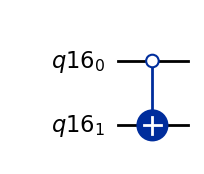

In [39]:
qc = QuantumCircuit(q)
qc.cx(q[0],q[1],ctrl_state='0')
qc.draw('mpl')

In [40]:
job = simulator.run(transpile(qc, simulator))
array_to_latex(job.result().get_unitary(qc, decimals=3))

<IPython.core.display.Latex object>

#### Porte $Y$ contrôlée

Appliquez la porte $Y$ au qubit cible si le qubit de contrôle est le MSB

$$
\mathtt{CY} = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & -i\\
0 & 0 & i & 0
\end{pmatrix},
$$

ou lorsque le LSB est le contrôle

$$
\mathtt{CY} = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 0 & -i\\
0 & 0 & 1 & 0\\
0 & i & 0 & 0
\end{pmatrix}.
$$

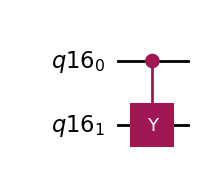

In [41]:
qc = QuantumCircuit(q)
qc.cy(q[0],q[1])
qc.draw('mpl')

In [42]:
job = simulator.run(transpile(qc, simulator))
array_to_latex(job.result().get_unitary(qc, decimals=3))

<IPython.core.display.Latex object>

#### Porte $Z$ contrôlée (ou Phase-Flip contrôlée)

De même, la porte Z contrôlée inverse la phase du qubit cible si le qubit de contrôle est $\ket{1}$. La matrice a la même apparence, que le MSB ou le LSB soit le qubit de contrôle :

$$
\mathtt{CZ} = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & -1
\end{pmatrix}
$$

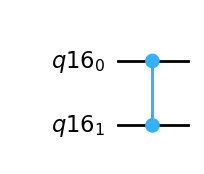

In [43]:
qc = QuantumCircuit(q)
qc.cz(q[0],q[1])
qc.draw('mpl')

In [44]:
job = simulator.run(transpile(qc, simulator))
array_to_latex(job.result().get_unitary(qc, decimals=3))

<IPython.core.display.Latex object>

### Porte Hadamard contrôlée

Appliquez la porte $H$ au qubit cible si le qubit de contrôle est $\ket{1}$. Ci-dessous, le cas où le contrôle est le qubit LSB.

$$
\mathtt{CH} = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & \frac{1}{\sqrt{2}} & 0 & \frac{1}{\sqrt{2}}\\
0 & 0 & 1 & 0\\
0 & \frac{1}{\sqrt{2}}  & 0& -\frac{1}{\sqrt{2}}
\end{pmatrix}
$$

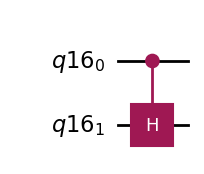

In [45]:
qc = QuantumCircuit(q)
qc.ch(q[0],q[1])
qc.draw('mpl')

In [46]:
job = simulator.run(transpile(qc, simulator))
array_to_latex(job.result().get_unitary(qc, decimals=3))

<IPython.core.display.Latex object>

### Portes à rotation contrôlée

#### Rotation contrôlée autour de l'axe Z

Effectuez une rotation autour de l'axe Z sur le qubit cible si le qubit de contrôle (ici LSB) est $\ket{1}$.

$$
\mathtt{CR}_z(\lambda) = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & e^{-i\lambda/2} & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & e^{i\lambda/2}
\end{pmatrix}
$$

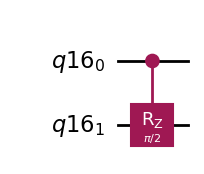

In [47]:
qc = QuantumCircuit(q)
qc.crz(pi/2,q[0],q[1])
qc.draw('mpl')

In [48]:
job = simulator.run(transpile(qc, simulator))
array_to_latex(job.result().get_unitary(qc, decimals=3))

<IPython.core.display.Latex object>

### Rotation de phase contrôlée

Effectuez une rotation de phase si les deux qubits sont dans l'état $\ket{11}$. La matrice a la même apparence, que le MSB ou le LSB soit le qubit de contrôle.

$$
\mathtt{CP}(\lambda) = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & e^{i\lambda}
\end{pmatrix}
$$

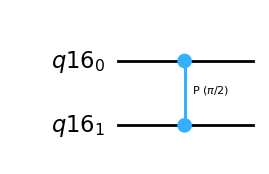

In [49]:
qc = QuantumCircuit(q)
qc.cp(pi/2,q[0], q[1])
qc.draw('mpl')

In [50]:
job = simulator.run(transpile(qc, simulator))
array_to_latex(job.result().get_unitary(qc, decimals=3))

<IPython.core.display.Latex object>

### Rotation $u$ contrôlée

Effectuez une rotation contrôlée-$u$ sur le qubit cible si le qubit de contrôle (ici LSB) est $\ket{1}$.

$$
\mathtt{CU}(\theta, \phi, \lambda) \equiv 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & e^{-i(\phi+\lambda)/2}\cos(\theta/2) & 0 & -e^{-i(\phi-\lambda)/2}\sin(\theta/2)\\
0 & 0 & 1 & 0\\
0 & e^{i(\phi-\lambda)/2}\sin(\theta/2) & 0 & e^{i(\phi+\lambda)/2}\cos(\theta/2)
\end{pmatrix}.
$$

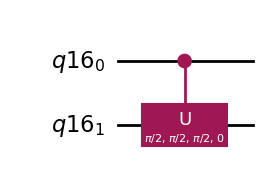

In [51]:
qc = QuantumCircuit(q)
qc.cu(pi/2, pi/2, pi/2, 0, q[0], q[1])
qc.draw('mpl')

In [52]:
job = simulator.run(transpile(qc, simulator))
array_to_latex(job.result().get_unitary(qc, decimals=3))

<IPython.core.display.Latex object>

### Portail SWAP

La porte SWAP échange les deux qubits. Il transforme les vecteurs de base comme

$$\ket{00} \rightarrow \ket{00}~,~\ket{01} \rightarrow \ket{10}~,~\ket{10} \rightarrow \ket{01}~,~\ket{11} \rightarrow \ket{11},$$

qui donne une représentation matricielle de la forme

$$
\mathrm{SWAP} = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1
\end{pmatrix}.
$$

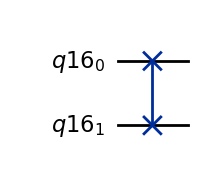

In [53]:
qc = QuantumCircuit(q)
qc.swap(q[0], q[1])
qc.draw('mpl')

In [54]:
job = simulator.run(transpile(qc, simulator))
array_to_latex(job.result().get_unitary(qc, decimals=3))

<IPython.core.display.Latex object>

## Portes à trois qubits 


Il existe deux portes à trois qubits couramment utilisées. Pour trois qubits, les vecteurs de base sont ordonnés comme

$$\left|000\right\rangle, \left|001\right\rangle, \left|010\right\rangle, \left|011\right\rangle, \left|100\right\rangle, \left|101\right\rangle, \left|110\right\rangle, \left|111\right\rangle,$$

qui, sous forme de chaînes de bits, représentent les entiers $0,1,2,\cdots, 7$. Encore une fois, Qiskit utilise une représentation dans laquelle le premier qubit est du côté le plus à droite du produit tensoriel et le troisième qubit est du côté le plus à gauche :

$$\left|abc\right\rangle : \underset{\text{qubit 2}}{\left|a\right\rangle}\otimes \underset{\text{qubit 1}}{\left|b\right\rangle}\otimes \underset{\text{qubit 0}}{\left|c\right\rangle}.$$

### Porte Toffoli (porte $\mathtt{CCX}$)

La [porte de Toffoli](https://en.wikipedia.org/wiki/Quantum_logique_porte#Toffoli_(CCNOT)_porte) retourne le troisième qubit si les deux premiers qubits ( LSB) sont tous deux $\ket{1}$ :

$$\left|abc\right\rangle \rightarrow \left|bc\oplus a\right\rangle \otimes \left|b\right\rangle \otimes \left|c\right\rangle.$$

Sous forme matricielle, la porte de Toffoli est
$$\mathtt{CCX} = \begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0
\end{pmatrix}.$$

In [55]:
q = QuantumRegister(3)

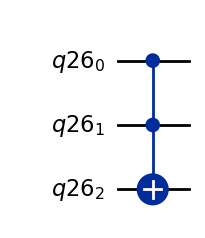

In [56]:
qc = QuantumCircuit(q)
qc.ccx(q[0], q[1], q[2])
qc.draw('mpl')

In [57]:
job = simulator.run(transpile(qc, simulator))
array_to_latex(job.result().get_unitary(qc, decimals=3))

<IPython.core.display.Latex object>

### Porte d'échange contrôlée (Fredkin Gate)

La [porte Fredkin](https://en.wikipedia.org/wiki/Quantum_logique_porte#Fredkin_(CSWAP)_porte), ou la *porte d'échange contrôlée*, échange les deuxième et troisième qubits si le premier qubit (LSB) est $\ket{1}$ :

$$ \left|abc\right\rangle \rightarrow \begin{cases} \left|bac\right\rangle~~\text{if}~c=1 \cr \left|abc\right\rangle~~\text{if}~c=0 \end{cases}.$$

Sous forme matricielle, la porte de Fredkin est

$$
\mathtt{C}_{\mathrm{SWAP}} = 
\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1
\end{pmatrix}.
$$

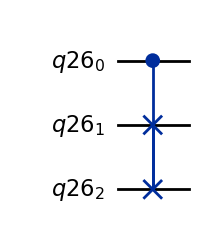

In [58]:
qc = QuantumCircuit(q)
qc.cswap(q[0], q[1], q[2])
qc.draw('mpl')

In [59]:
job = simulator.run(transpile(qc, simulator))
array_to_latex(job.result().get_unitary(qc, decimals=3))

<IPython.core.display.Latex object>

## Do it yourself

Ecrire le code qiskit qui reproduit le circuit suivant

![qkpg2](./Graphics/qkpg2.png)


## Opérations non unitaires

Maintenant que nous avons parcouru toutes les opérations unitaires dans les circuits quantiques, nous avons également accès aux opérations non unitaires. Celles-ci incluent les mesures, la réinitialisation des qubits et les opérations conditionnelles classiques.

In [60]:
q = QuantumRegister(1)
c = ClassicalRegister(1)

### Des mesures

Nous n'avons pas accès à toutes les informations lorsque nous effectuons une mesure dans un calculateur quantique. L'état quantique est projeté sur la base standard. Ci-dessous, deux exemples montrant un circuit préparé dans un état de base et le calculateur quantique préparé dans un état de superposition.

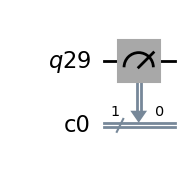

In [61]:
qc = QuantumCircuit(q, c)
qc.measure(q, c)
qc.draw('mpl')

In [62]:
simulator = QasmSimulator()
job = simulator.run(transpile(qc, simulator))
job.result().get_counts(qc)

{'0': 1024}

Le simulateur prédit que 100 % du temps, le registre classique renvoie 0.

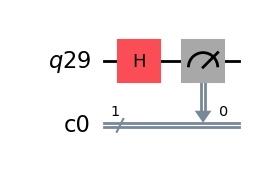

In [63]:
qc = QuantumCircuit(q, c)
qc.h(q)
qc.measure(q, c)
qc.draw('mpl')

In [64]:
job = simulator.run(transpile(qc, simulator))
job.result().get_counts(qc)

{'0': 512, '1': 512}

Le simulateur prédit que 50 % du temps, le registre classique renvoie 0 ou 1.

### Réinitialiser
Il est également possible de réinitialiser (`reset`) les qubits à l'état $\ket{0}$ au milieu du calcul. Notez que `reset` n'est pas une opération porte, car elle est irréversible.

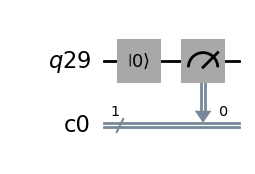

In [65]:
qc = QuantumCircuit(q, c)
qc.reset(q[0])
qc.measure(q, c)
qc.draw('mpl')

In [66]:
job = simulator.run(transpile(qc, simulator))
job.result().get_counts(qc)

{'0': 1024}

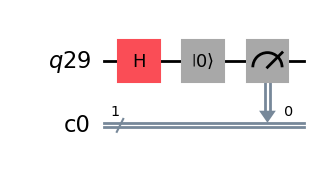

In [67]:
qc = QuantumCircuit(q, c)
qc.h(q)
qc.reset(q[0])
qc.measure(q, c)
qc.draw('mpl')

In [68]:
job = simulator.run(transpile(qc, simulator))
job.result().get_counts(qc)

{'0': 1024}

Ici, nous voyons que pour ces deux circuits, le simulateur prédit toujours que la sortie est de 100 % à l'état 0.

### Opérations conditionnelles
Il est également possible de faire des opérations conditionnées sur l'état du registre classique

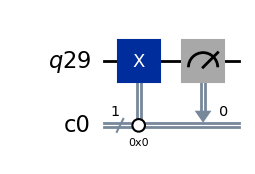

In [69]:
qc = QuantumCircuit(q, c)
qc.x(q[0]).c_if(c, 0)
qc.measure(q,c)
qc.draw('mpl')

Ici le bit classique prend toujours la valeur 0 donc l'état du qubit est toujours inversé.

In [70]:
job = simulator.run(transpile(qc, simulator))
job.result().get_counts(qc)

{'1': 1024}

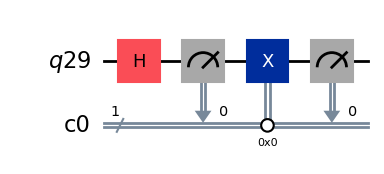

In [71]:
qc = QuantumCircuit(q, c)
qc.h(q)
qc.measure(q,c)
qc.x(q[0]).c_if(c, 0)
qc.measure(q,c)
qc.draw('mpl')

In [72]:
qc.x(q[0]).c_if??

Object `c_if` not found.


In [73]:
job = simulator.run(transpile(qc, simulator))
job.result().get_counts(qc)

{'1': 1024}

Ici, le bit classique de la première mesure est aléatoire, mais l'opération conditionnelle aboutit à ce que le qubit soit placé de manière déterministe dans $\ket{1}$.